[[ 39.79949649  -3.72930382]
 [ 35.76198687   2.88041759]
 [ 29.46581538 -16.3177755 ]
 ...
 [ 70.5624731   82.59669762]
 [ 68.38426255  83.29277277]
 [ 74.38248315  74.32157031]]
(201850, 2)


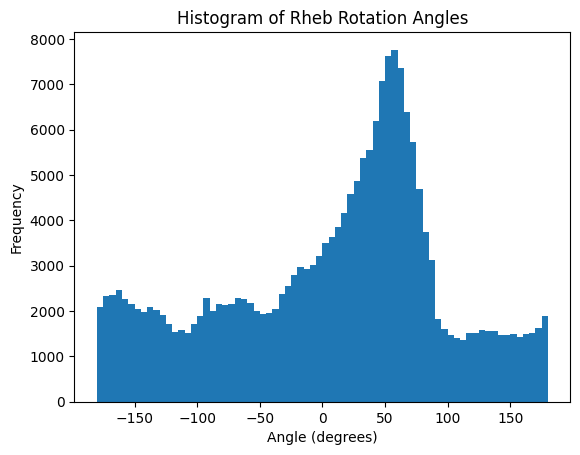

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns
#load the data + pair the values to create a 2D array 
tilt = np.loadtxt('Rheb_GTPtiltangles.txt')
rotation = np.loadtxt('Rheb_GTProtationangles.txt')
assert len(tilt) == len(rotation), "Tilt and rotation arrays must have the same length"

#2D array making process: each row is [tilt, rotation] 
X = np.column_stack((tilt, rotation))
print(X)
print(X.shape)

#convert tilt and rotation from degrees to radians
tilt_rad = np.deg2rad(tilt)
rotation_rad = np.deg2rad(rotation)

X_circ = np.column_stack([
    np.cos(tilt_rad), np.sin(tilt_rad),
    np.cos(rotation_rad), np.sin(rotation_rad)
])


#plot data to see how it looks 
angles = np.loadtxt('Rheb_GTProtationangles.txt') 
plt.hist(angles, bins=72, range=(-180, 180)) #5º bins from -180 to 180(covers all rotation choice)
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Histogram of Rheb Rotation Angles')
plt.show()

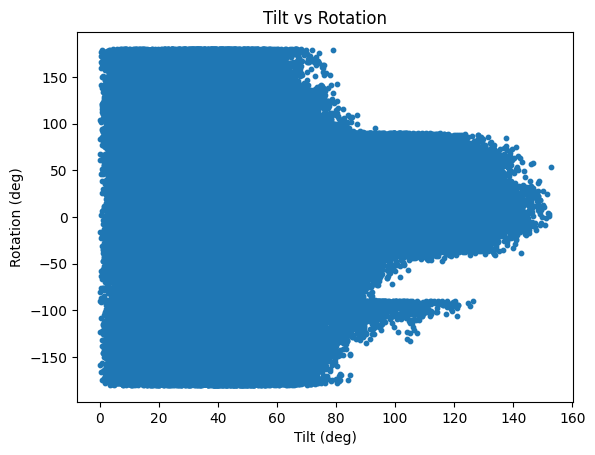

In [2]:
#plots a scatter plot to visualize the relationship between tilt and rotation angles
plt.scatter(tilt, rotation, s=10)
plt.xlabel('Tilt (deg)')
plt.ylabel('Rotation (deg)')
plt.title('Tilt vs Rotation')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


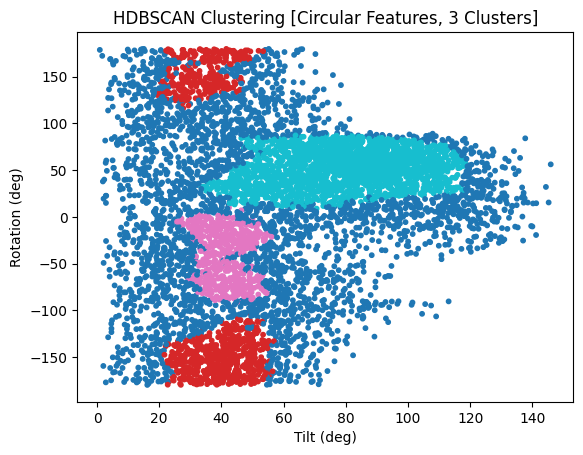

Number of clusters found: 3


In [3]:
#merges clusters based on distance between points, does not require you to specify the number of clusters in advance
# you can choose the number of clusters you want to find, e.g., n_clusters=3
# Convert angles to radians

step = 30
X_sub = X[::step]
tilt_sub = tilt[::step]
rotation_sub = rotation[::step]
X_circ_sub = X_circ[::step]

clusterer = hdbscan.HDBSCAN(min_cluster_size=90)
labels = clusterer.fit_predict(X_circ_sub)

plt.scatter(tilt_sub, rotation_sub, c=labels, cmap='tab10', s=10)
plt.xlabel('Tilt (deg)')
plt.ylabel('Rotation (deg)')
plt.title('HDBSCAN Clustering [Circular Features, 3 Clusters]')
plt.show()

# Print number of clusters found (excluding noise, labeled as -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found: {n_clusters}")

In [1]:
import pyemma
import pyemma.msm as msm

# remove noise points (labeled -1) and keep only valid clustered points
valid_idx = labels != -1
clustered_traj = labels[valid_idx].astype(int)  

# Lag times to test (in frames/steps)
lag_times = np.arange(1, 101, 5)

# Calculate implied timescales
its = pyemma.msm.its([clustered_traj], lags=lag_times, n_jobs=1)

# Plot implied timescales
pyemma.plots.plot_implied_timescales(its, units='steps', dt=1)
plt.title('Implied Timescales vs Lag Time')
plt.show()
#red is the second slowest process, blue is the slowest process 
#lag is around 30 steps 

ModuleNotFoundError: No module named 'pyemma'

In [2]:
hosen_lag = 30

msm_model = msm.estimate_markov_model([clustered_traj], lag=chosen_lag)
print("\nTransition Matrix:", msm_model.transition_matrix)
print("\nStationary distribution:", msm_model.stationary_distribution)
print("\nTimescales (steps):", msm_model.timescales(k=3)) 


NameError: name 'msm' is not defined

In [3]:
# Run CK test for 3 metastable states (since you have 3 clusters)
cktest = msm_model.cktest(3)

# Plot CK test results with improved layout
plt.figure(figsize=(10, 10))  
pyemma.plots.plot_cktest(cktest)
plt.tight_layout()           
plt.show()

NameError: name 'msm_model' is not defined